# NLP Tutorial - Text Representation: TF-IDF


## What is TF-IDF?

TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

Term Frequency(TF) = [number of times word appeared / total no of words in a document]

Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]

In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

## Finally:

TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

Let's see a Sample Demo

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
    
]

In [2]:
v=TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [3]:
#let's print the vocabulary


print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [4]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    idx = v.vocabulary_.get(word) # get the vocabulary of all the features
    
    idf_score = v.idf_[idx]
    
    print(f"{word}:{idf_score}")

already:2.386294361119891
am:2.386294361119891
amazon:2.386294361119891
and:2.386294361119891
announcing:1.2876820724517808
apple:2.386294361119891
are:2.386294361119891
ate:2.386294361119891
biryani:2.386294361119891
dot:2.386294361119891
eating:1.9808292530117262
eco:2.386294361119891
google:2.386294361119891
grapes:2.386294361119891
iphone:2.386294361119891
ironman:2.386294361119891
is:1.1335313926245225
loki:2.386294361119891
microsoft:2.386294361119891
model:2.386294361119891
new:1.2876820724517808
pixel:2.386294361119891
pizza:2.386294361119891
surface:2.386294361119891
tesla:2.386294361119891
thor:2.386294361119891
tomorrow:1.2876820724517808
you:2.386294361119891


In [5]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

# Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

This data consists of two columns.

Text: Description of an item sold on e-commerce website

Label: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

In [6]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head()

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [7]:
df['label'].value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [8]:
#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})


In [9]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


# Train test split

Build a model with original text (no pre processing)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.Text,df.label_num,test_size=0.2,random_state=2022,stratify=df.label_num)

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [12]:
X_train.head()

15820    IRIS Furniture Children Deluxe Spiderman Toddl...
23224    Godox CB-09 Hard Carrying Storage Suitcase Car...
4638     Ugreen All in 1 USB 3.0 Card Reader USB Memory...
15245    Spread Spain Metallic Gold Bar Trolley/Kitchen...
5378     Chromozome Men's Calf Socks (Pack of 3) (SX-3 ...
Name: Text, dtype: object

In [13]:
y_train.value_counts()

0    4800
2    4800
3    4800
1    4800
Name: label_num, dtype: int64

In [14]:
y_test.value_counts()

0    1200
2    1200
3    1200
1    1200
Name: label_num, dtype: int64

# Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

# Note:

use TF-IDF for pre-processing the text.

use KNN as the classifier

print the classification report.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [16]:
clf = Pipeline([
    ('tf_idf_vectorizer',TfidfVectorizer()),
    ('KNeighbors',KNeighborsClassifier())
])


clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [17]:
X_test[:5]

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19166    GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209    FabSeasons Camouflage Polyester Multi Function...
2462     Indian Superfoods: Change the Way You Eat Revi...
6621     Milton Marvel Insulated Steel Casseroles, Juni...
Name: Text, dtype: object

In [18]:
y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [19]:
y_pred[:5]

array([0, 2, 3, 1, 0], dtype=int64)

# Attempt 2 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

# Note:

use TF-IDF for pre-processing the text.

use MultinomialNB as the classifier.

print the classification report.

In [20]:


from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('tf_idf_vectorizer2',TfidfVectorizer()),
    ('MultiNB',MultinomialNB())
])



clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



# Attempt 3 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

# Note:

use TF-IDF for pre-processing the text.

use Random Forest as the classifier.

print the classification report.

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('tf_idf_vectorizer',TfidfVectorizer()),
    ('random_forest',RandomForestClassifier())
])


clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.98      0.98      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [22]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    
    doc = nlp(text)
    
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            filtered_tokens.append(token.lemma_)
    
    return "".join(filtered_tokens)

In [23]:
df['preprocessed_text']=df['Text'].apply(preprocess)

In [24]:
df.head()

,Text,label,label_num,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,"Back-)ain.thehavea,whichatyour.thebackbefor-an..."
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,",,,,and**-:useas,orasatheandmakefor.thebewithb..."
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,-toany.upto.and
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,"fromjusttoof,,andandforyourone's,itand.these-b..."
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,'swith(-)thisbeof&with.


In [25]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [26]:
df.preprocessed_text[0]

'Back-)ain.thehavea,whichatyour.thebackbefor-andwhenyouback.the.theusethetothatandthemakeittomovearoundyour.totheforanywillbedobytheattheofonly.'

# Build a model with pre processed text

In [27]:
X_train,X_test,y_train,y_test = train_test_split(
    df.preprocessed_text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

# Let's check the scores with our best model till now

Random Forest

In [28]:
clf = Pipeline([
    ('tf_idf_vectorizer',TfidfVectorizer()),
    ('randomforest',RandomForestClassifier())
])


clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1200
           1       0.71      0.92      0.80      1200
           2       0.83      0.82      0.83      1200
           3       0.85      0.73      0.78      1200

    accuracy                           0.81      4800
   macro avg       0.82      0.81      0.81      4800
weighted avg       0.82      0.81      0.81      4800



If you compare above classification report with respect to RandomForest Model with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

# Plot confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 921,  118,   92,   69],
       [  15, 1098,   46,   41],
       [  49,  121,  986,   44],
       [  55,  213,   61,  871]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

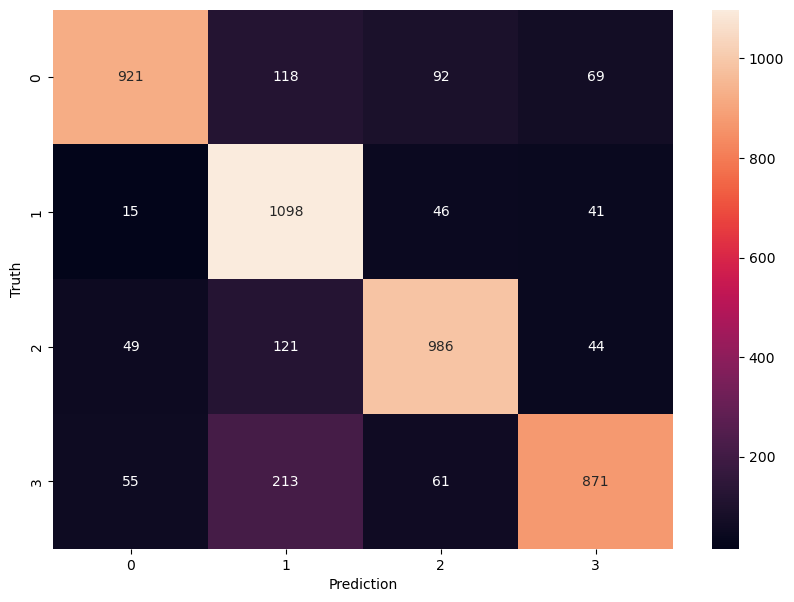

In [30]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# TF-IDF: Exercises

Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.

In Social Media like Twitter and Instagram, many people express their views through comments about a particular event/scenario and these comments may address the feelings like sadness, happiness, joy, sarcasm, fear, and many other.

For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!

We are going to use techniques like Bag of grams, n-grams, TF-IDF, etc. for text representation and apply different classification algorithms.

# About Data: Emotion Detection

Credits: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

This data consists of two columns. - Comment - Emotion

Comment are the statements or messages regarding to a particular event/situation.

Emotion feature tells whether the given comment is fear 😨, Anger 😡, Joy 😂.

As there are only 3 classes, this problem comes under the Multi-Class Classification.

In [31]:
#import pandas library
import pandas as pd


#read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
df=pd.read_csv('Emotion_classify_Data.csv')


#print the shape of dataframe
df.shape


#print top 5 rows
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [32]:
#check the distribution of Emotion
df['Emotion'].value_counts()

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

In [33]:
#Add the new column "Emotion_num" which gives a unique number to each of these Emotions
#joy --> 0, fear --> 1, anger --> 2
df['Emotion_num']=df['Emotion'].map({'anger':0,'joy':1,'fear':2})


#checking the results by printing top 5 rows
df.head()

,Comment,Emotion,Emotion_num
0,i seriously hate one subject to death but now ...,fear,2
1,im so full of life i feel appalled,anger,0
2,i sit here to write i start to dig out my feel...,fear,2
3,ive been really angry with r and i feel like a...,joy,1
4,i feel suspicious if there is no one outside l...,fear,2


In [34]:
#import train-test split
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20%

X_train,X_test,y_train,y_test = train_test_split(
    df.Comment,
    df.Emotion_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.Emotion_num
)
#Note: Give Random state 2022 and also do the stratify sampling

In [35]:
#print the shapes of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(4749,)
(1188,)


# Attempt 1 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

# Note:

using CountVectorizer with only trigrams.
use RandomForest as the classifier.
print the classification report.

In [36]:
#import CountVectorizer, RandomForest, pipeline, classification_report from sklearn 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report



#1. create a pipeline object

clf = Pipeline([
    ('count_vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('randomforest',RandomForestClassifier())
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)



#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)



#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.46      0.46       400
           1       0.60      0.25      0.35       400
           2       0.42      0.69      0.53       388

    accuracy                           0.46      1188
   macro avg       0.50      0.46      0.45      1188
weighted avg       0.50      0.46      0.44      1188



# Attempt 2 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

# Note:

using CountVectorizer with both unigram and bigrams.
use Multinomial Naive Bayes as the classifier.
print the classification report.

In [37]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       400
           1       0.88      0.88      0.88       400
           2       0.86      0.86      0.86       388

    accuracy                           0.88      1188
   macro avg       0.88      0.88      0.88      1188
weighted avg       0.88      0.88      0.88      1188



# Attempt 3 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

# Note:

using CountVectorizer with both unigram and Bigrams.
use RandomForest as the classifier.
print the classification report.

In [38]:
#1. create a pipeline object
clf = Pipeline([
    ('count_vectorizer_bi',CountVectorizer(ngram_range=(1,2))),
    ('random_forest',RandomForestClassifier())
])




#2. fit with X_train and y_train
clf.fit(X_train,y_train)



#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)



#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       400
           1       0.86      0.96      0.91       400
           2       0.94      0.87      0.91       388

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



# Attempt 4 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

# Note:

using TF-IDF vectorizer for Pre-processing the text.
use RandomForest as the classifier.
print the classification report.

In [39]:
#import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer




#1. create a pipeline object
clf = Pipeline([
    ('tf_idf_vectorizer',TfidfVectorizer()),
    ('random_forest',RandomForestClassifier())
])


#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       400
           1       0.89      0.92      0.91       400
           2       0.92      0.92      0.92       388

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [40]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 


#use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [41]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_comment']=df['Comment'].apply(preprocess)

# Build a model with pre processed text



In [42]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Use the preprocessed_Comment
X_train,X_test,y_train,y_test = train_test_split(
    df.preprocessed_comment,
    df.Emotion_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.Emotion_num
)

# Let's check the scores with our best model till now

Random Forest

# Attempt1 :

using the sklearn pipeline module create a classification pipeline to classify the Data.

# Note:

using CountVectorizer with both unigrams and bigrams.

use RandomForest as the classifier.

print the classification report.

In [43]:
#1. create a pipeline object
clf = Pipeline([
    ('count_vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('random_forest',RandomForestClassifier())
])




#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)



#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       400
           1       0.94      0.96      0.95       400
           2       0.95      0.91      0.93       388

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



# Attempt 2 :

using the sklearn pipeline module create a classification pipeline to classify the data.

# Note:

using TF-IDF vectorizer for pre-processing the text.

use RandomForest as the classifier.

print the classification report.

In [44]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       400
           1       0.94      0.95      0.94       400
           2       0.92      0.92      0.92       388

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



# Final Observations

As part of this exercise we have trained the data with algorithms like Multinomial Naive Bayes and Random Forest which are most used and provide good results for text related problems.

As Machine learning algorithms do not work on text data directly, we need to convert them into numeric vectors and feed that into models while training. For this purpose, we have used Bag of words(unigrams, bigrams, n-grams) and TF-IDF text representation techniques.

# Key Findings

As the n_gram range keeps increasing, there's drastic fall of improvement in performance metrics.

There's seen a significant improvement in results before pre-processing and after pre-processing the data.

TF-IDF and Bag of words both performed equally well in performance metrics like Recall and F1-score.

Random Forest performed quite well when compared to Multinomial Naive Bayes.

## Machine Learning is like a trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which gives good results and satisfies the requirements like latency, interpretability, etc.

In [47]:
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     -------------------------------------- 0.0/400.7 MB 991.0 kB/s eta 0:06:45
     ---------------------------------------- 0.1/400.7 MB 1.6 MB/s eta 0:04:07
     ---------------------------------------- 0.2/400.7 MB 1.8 MB/s eta 0:03:43
     ---------------------------------------- 0.5/400.7 MB 2.9 MB/s eta 0:02:21
     ---------------------------------------- 1.0/400.7 MB 4.6 MB/s eta 0:01:27
     ---------------------------------------- 1.7/400.7 MB 5.9 MB/s eta 0:01:08
     ---------------------------------------- 2.5/400.7 MB 8.0 MB/s eta 0:00:50
     --------------------------------------- 3.9/400.7 MB 10.8 MB/s eta 0:00:37
     --------------------------------------- 3.9/400.7 MB 10.8 MB/s eta 0:00:37
     --------------------------------------- 3.9/400.7 MB 10.8 MB/s eta 0:00:37
     ---------------------------------------- 4.5/400.7 MB 8.9 MB/s eta 0:00:45
     ---------------------------------------- 5

In [48]:
import spacy

# word vectors occupy lot of space. hence en_core_web_sm model do not have them included. 
# In order to download
# word vectors you need to install large or medium english model. We will install the large one!
# make sure you have run "python -m spacy download en_core_web_lg" to install large english model
nlp = spacy.load("en_core_web_lg")

In [49]:
doc = nlp('dog cat banana kem')

for token in doc:
    print(token.text,"Vector:",token.has_vector,"OOV:",token.is_oov)

dog Vector: True OOV: False
cat Vector: True OOV: False
banana Vector: True OOV: False
kem Vector: True OOV: False


In [52]:
doc[0].vector.shape

(300,)

In [53]:
base_token = nlp('bread')
base_token.vector.shape

(300,)

In [54]:
doc = nlp("bread sandwich burger car tiger human wheat")

for token in doc:
    print(f"{token.text} -> {base_token.text}:",token.similarity(base_token))

bread -> bread: 0.9999999766167111
sandwich -> bread: 0.6874560014053445
burger -> bread: 0.5440373883702087
car -> bread: 0.1644114584391833
tiger -> bread: 0.14492353269643002
human -> bread: 0.21103659037655728
wheat -> bread: 0.6572456428272563


In [57]:
base_token = nlp('iphone')
base_token.vector.shape

(300,)

In [58]:
doc = nlp("apple samsung iphone dog kitten")

for token in doc:
    print(f"{token.text} -> {base_token.text}:",token.similarity(base_token))

apple -> iphone: 0.6339781147910419
samsung -> iphone: 0.6678678014329177
iphone -> iphone: 1.0000000285783557
dog -> iphone: 0.17431037640553934
kitten -> iphone: 0.14685812907484028


In [59]:
king = nlp.vocab["king"].vector
man = nlp.vocab["man"].vector
woman = nlp.vocab["woman"].vector
queen = nlp.vocab['queen'].vector

result = king-man+woman

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([result], [queen])

array([[0.7880844]], dtype=float32)

# NLP Tutorial: Text Classification Using Spacy Word Embeddings

## Problem Statement

Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

Fake news spreads faster than real news and creates problems and fear among groups and in society.

We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

We will use glove embeddings from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.

## Dataset

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

This data consists of two columns. - Text - label

Text is the statements or messages regarding a particular event/situation.

label feature tells whether the given text is Fake or Real.

As there are only 2 classes, this problem comes under the Binary Classification.

In [61]:
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("Fake_Real_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [62]:
df['label'].value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [63]:
df['label_num']=df['label'].map({'Fake':0,'Real':1})

In [64]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


# Get spacy word vectors and store them in a pandas dataframe

In [66]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [67]:
df['Vector']=df['Text'].apply(lambda text: nlp(text).vector)

In [68]:
df.head()

,Text,label,label_num,Vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    df.Vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022

)

In [71]:
import numpy as np

In [72]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [78]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1024
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [80]:
from  sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

clf.fit(X_train_2d,y_train)

y_pred = clf.predict(X_test_2d)


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



# Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

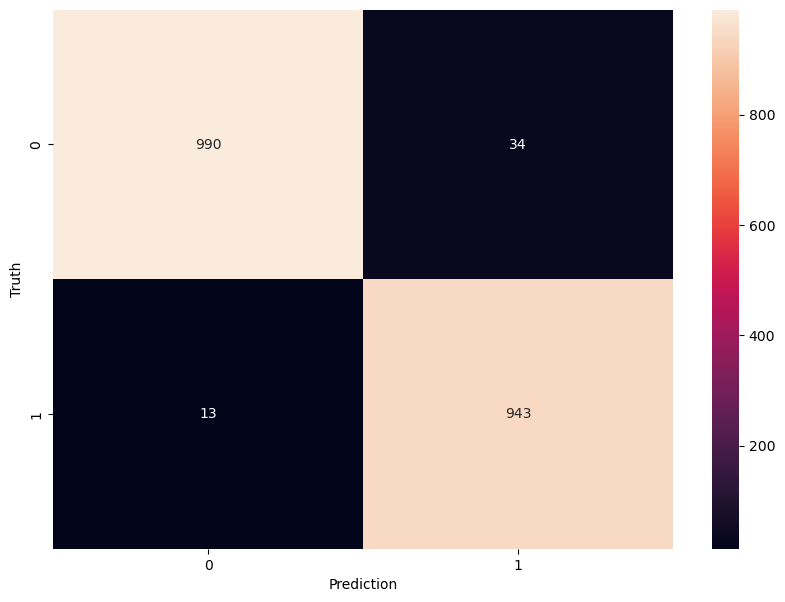

In [81]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Key Takeaways

KNN model which didn't perform well in the vectorization techniques like Bag of words, and TF-IDF due to very high dimensional vector space, performed really well with glove vectors due to only 300-dimensional vectors and very good embeddings(similar and related words have almost similar embeddings) for the given text data.

MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. The Naive Bayes model does not fit the data if there are negative values. So, to overcome this shortcoming, we have used the Min-Max scaler to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data. But anyhow we got a decent recall and f1 scores.

# spacy_text_classification : Exercise

In this exercise, you are going to classify whether a given text belongs to one of possible classes ['BUSINESS', 'SPORTS', 'CRIME'].

you are going to use spacy for pre-processing the text, convert text to numbers and apply different classification algorithms.

In [82]:
import spacy

nlp = spacy.load("en_core_web_lg")

# About Data: News Category Classifier

Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

This data consists of two columns. - Text - Category

Text are the description about a particular topic.

Category determine which class the text belongs to.

we have classes mainly of 'BUSINESS', 'SPORTS', 'CRIME' and comes under Multi-class classification Problem

In [84]:
#import pandas library
import pandas as pd



#read the dataset "news_dataset.json" provided and load it into dataframe "df"
df=pd.read_json('news_dataset.json')



#print the shape of data
df.shape


#print the top5 rows
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [85]:
#check the distribution of labels 
df['category'].value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [86]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num']=df['category'].map({'BUSINESS':0,'SPORTS':1,'CRIME':2,'SCIENCE':3})



#check the results with top 5 rows
df.head()

,text,category,label_num
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,3
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,3
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,0
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,0
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,2


# Preprocess the text

In [87]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [88]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]
df['preprocessed_tex']=df['text'].apply(preprocess)

In [89]:
#print the top 5 rows
df.head()

,text,category,label_num,preprocessed_tex
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,3,watch Schrödinger Cat Die University Californi...
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,3,watch freaky Vortex open Flooded Lake
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,0,entrepreneur today need Big Budget start year ...
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,0,Roads recharge Electric Car drive high tech hi...
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,2,Civilian Guard fire Gun protect Recruiting Cen...


# Get the spacy embeddings for each preprocessed text

In [90]:
#create a new column "vector" that store the vector representation of each pre-processed text
df['vector']=df['preprocessed_tex'].apply(lambda x:nlp(x).vector)

In [91]:
#print the top 5 rows
df.head()

,text,category,label_num,preprocessed_tex,vector
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,3,watch Schrödinger Cat Die University Californi...,"[-0.06900189, 0.12649769, -0.08325721, -0.0683..."
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,3,watch freaky Vortex open Flooded Lake,"[0.18442868, -0.043652277, -0.08334134, -0.073..."
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,0,entrepreneur today need Big Budget start year ...,"[-0.12823991, 0.16327743, -0.018897016, -0.158..."
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,0,Roads recharge Electric Car drive high tech hi...,"[0.27523246, 0.33113563, 0.07515378, -0.249497..."
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,2,Civilian Guard fire Gun protect Recruiting Cen...,"[0.0315163, 0.056255504, 0.13033131, 0.1553470..."


# Train-Test splitting

In [97]:
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [99]:
import numpy as np

print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (10156,)
Shape of X_test before reshaping:  (2539,)
Shape of X_train after reshaping:  (10156, 300)
Shape of X_test after reshaping:  (2539, 300)


# Attempt 1:

use spacy glove embeddings for text vectorization.

use Decision Tree as the classifier.

print the classification report.

In [102]:
from sklearn.tree import DecisionTreeClassifier


#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()




#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d,y_train)



#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)



#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       851
           1       0.73      0.77      0.75       833
           2       0.71      0.71      0.71       579
           3       0.56      0.53      0.54       276

    accuracy                           0.71      2539
   macro avg       0.68      0.68      0.68      2539
weighted avg       0.70      0.71      0.70      2539



# Attempt 2:

use spacy glove embeddings for text vectorization.

use MultinomialNB as the classifier after applying the MinMaxscaler.

print the classification report.

In [103]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

scaler = MinMaxScaler()

scaled_embed_train = scaler.fit_transform(X_train_2d)
scaled_embed_test = scaler.transform(X_test_2d)

clf = MultinomialNB()

clf.fit(scaled_embed_train,y_train)

y_pred = clf.predict(scaled_embed_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       851
           1       0.83      0.89      0.86       833
           2       0.93      0.72      0.81       579
           3       1.00      0.09      0.17       276

    accuracy                           0.78      2539
   macro avg       0.86      0.66      0.66      2539
weighted avg       0.82      0.78      0.75      2539



# Attempt 3:

use spacy glove embeddings for text vectorization.

use KNeighborsClassifier as the classifier after applying the MinMaxscaler.

print the classification report.

In [107]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf = KNeighborsClassifier() 



#2. fit with all_train_embeddings and y_train

clf.fit(X_train_2d,y_train)



#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)



#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       851
           1       0.93      0.90      0.92       833
           2       0.88      0.91      0.89       579
           3       0.93      0.63      0.75       276

    accuracy                           0.89      2539
   macro avg       0.90      0.85      0.86      2539
weighted avg       0.89      0.89      0.89      2539



# Attempt 4:

use spacy glove embeddings for text vectorization.

use RandomForestClassifier as the classifier after applying the MinMaxscaler.

print the classification report.

In [106]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()




#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d,y_train)



#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)



#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       851
           1       0.88      0.90      0.89       833
           2       0.90      0.88      0.89       579
           3       0.92      0.60      0.73       276

    accuracy                           0.87      2539
   macro avg       0.88      0.82      0.84      2539
weighted avg       0.87      0.87      0.87      2539



# Attempt 5:

use spacy glove embeddings for text vectorization.

use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.

print the classification report.

In [108]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       851
           1       0.91      0.91      0.91       833
           2       0.90      0.89      0.90       579
           3       0.84      0.72      0.78       276

    accuracy                           0.89      2539
   macro avg       0.88      0.86      0.87      2539
weighted avg       0.89      0.89      0.89      2539



# Print the confusion Matrix with the best model got

Text(95.72222222222221, 0.5, 'Truth')

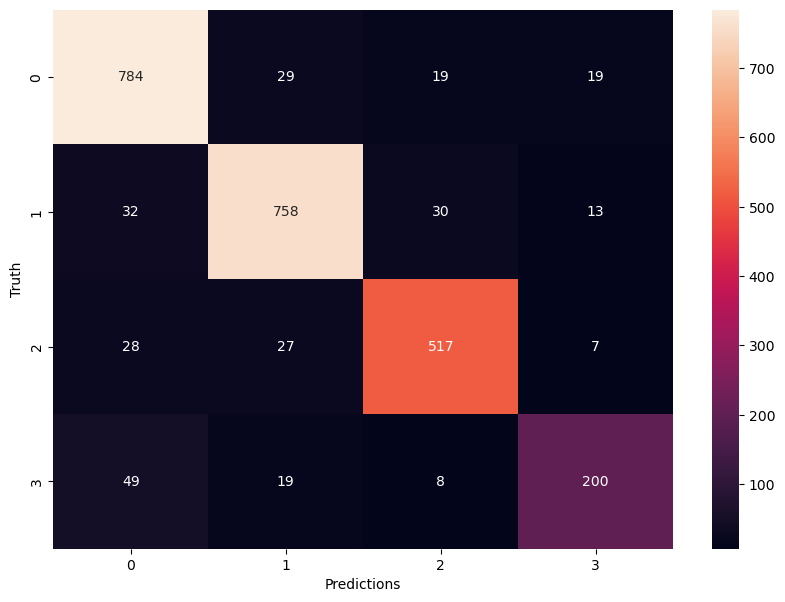

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [113]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [114]:
wv.similarity(w1="great",w2="good")

0.72915095

In [115]:
wv.most_similar("good")

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.6442928910255432),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034207344055),
 ('lousy', 0.5764203071594238)]

In [116]:
wv.most_similar("dog")

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428980827332),
 ('pit_bull', 0.7803961038589478),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609456777572632),
 ('golden_retriever', 0.7500901818275452),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418621182441711),
 ('pup', 0.740691065788269)]

In [118]:
wv.most_similar(positive=['king','woman'],negative=['man'],topn=5)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133)]

In [119]:
wv.most_similar(positive=['france','berlin'],negative=['paris'],topn=5)

[('germany', 0.5094344019889832),
 ('european', 0.4865044951438904),
 ('german', 0.4714890420436859),
 ('austria', 0.46964025497436523),
 ('swedish', 0.4645182490348816)]

In [121]:
wv.doesnt_match(['facebook','cat','google','microsoft'])

'cat'

In [122]:
wv.doesnt_match(["dog", "cat", "google", "mouse"])

'google'

# Gensim: Glove

Stanford's page on GloVe: https://nlp.stanford.edu/projects/glove/

In [123]:
glv = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [124]:
glv.most_similar("good")

[('too', 0.9648016691207886),
 ('day', 0.9533665180206299),
 ('well', 0.9503170847892761),
 ('nice', 0.9438973665237427),
 ('better', 0.9425962567329407),
 ('fun', 0.941892683506012),
 ('much', 0.9413353800773621),
 ('this', 0.9387555122375488),
 ('hope', 0.9383508563041687),
 ('great', 0.9378516674041748)]

In [125]:
glv.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

In [126]:
glv.doesnt_match("facebook cat google microsoft".split())

'cat'

In [127]:
glv.doesnt_match("banana grapes orange human".split())

'human'

In [134]:
wv.similarity(w1="great", w2="good")

0.72915095

In [135]:
wv_great = wv["great"]
wv_good = wv["good"]

In [136]:
wv_great.shape, wv_good.shape

((300,), (300,))

# Fake vs Real News Classification Using This Word2Vec Embeddings

Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

Fake news spreads faster than real news and creates problems and fear among groups and in society.

We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

We will use glove embeddings from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.

# Dataset

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

This data consists of two columns. - Text - label

Text is the statements or messages regarding a particular event/situation.

label feature tells whether the given text is Fake or Real.

As there are only 2 classes, this problem comes under the Binary Classification.

In [137]:
import pandas as pd


#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("fake_and_real_news.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [138]:
#check the distribution of labels 
df['label'].value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [139]:
#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

#check the results with top 5 rows
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


Now we will convert the text into a vector using gensim's word2vec embeddings.

We will do this in three steps,

Preprocess the text to remove stop words, punctuations and get lemma for each word

Get word vectors for each of the words in a pre-processed sentece

Take a mean of all word vectors to derive the numeric representation of the entire news article

First let's explore get_mean_vector api of gensim to see how it works

In [140]:
r1 = np.mean([wv_good,wv_great],axis=0)


In [141]:
wv_good[:5]

array([ 0.04052734,  0.0625    , -0.01745605,  0.07861328,  0.03271484],
      dtype=float32)

In [142]:
wv_great[:5]

array([ 0.07177734,  0.20800781, -0.02844238,  0.17871094,  0.1328125 ],
      dtype=float32)

In [143]:
r1[:5]

array([ 0.05615234,  0.1352539 , -0.02294922,  0.12866211,  0.08276367],
      dtype=float32)

In [144]:
r2 = wv.get_mean_vector(["good","great"],pre_normalize=False)

In [145]:
r2[:5]

array([ 0.05615234,  0.1352539 , -0.02294922,  0.12866211,  0.08276367],
      dtype=float32)

# Now let's write the function that can do preprocessing and vectorization both

In [146]:
import spacy
nlp = spacy.load("en_core_web_lg") # if this fails then run "python -m spacy download en_core_web_lg" to download that model

def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return wv.get_mean_vector(filtered_tokens)

In [147]:
v = preprocess_and_vectorize("Don't worry if you don't understand")
v.shape

(300,)

In [148]:
#this query takes few minutes, so go get some walk :)

df['vector']=df['Text'].apply(lambda x: preprocess_and_vectorize(x))

In [149]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.0085234195, 0.019263458, -0.010577418, 0.03..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.00861828, 0.007408227, 0.0007675802, 0.0138..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.01793007, 0.006029178, -0.0054984074, 0.038..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.0124946935, 0.0121258395, -0.00019833064, 0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.002259819, 0.01164962, 0.0036556108, 0.028..."


# Train-Test splitting

In [150]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

# Reshaping the X_train and X_test so as to fit for models

In [152]:
print(X_train.shape)

print(X_test.shape)

X_train_2d = np.stack(X_train)

X_test_2d = np.stack(X_test)

print(X_train_2d.shape)

print(X_train_2d.shape)

(7920,)
(1980,)
(7920, 300)
(7920, 300)


# Train Machine Learning Model

I tried Random forest, decision tree, naive bayes etc classifiers as well but gradient boosting gave the best performance of all

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()

clf.fit(X_train_2d,y_train)

y_pred=clf.predict(X_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      0.99      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [154]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_vector_news = [preprocess_and_vectorize(n) for n in test_news]
clf.predict(test_vector_news)

array([1, 0, 0], dtype=int64)

# Confusion Matrix for Best Model

Text(95.72222222222221, 0.5, 'Truth')

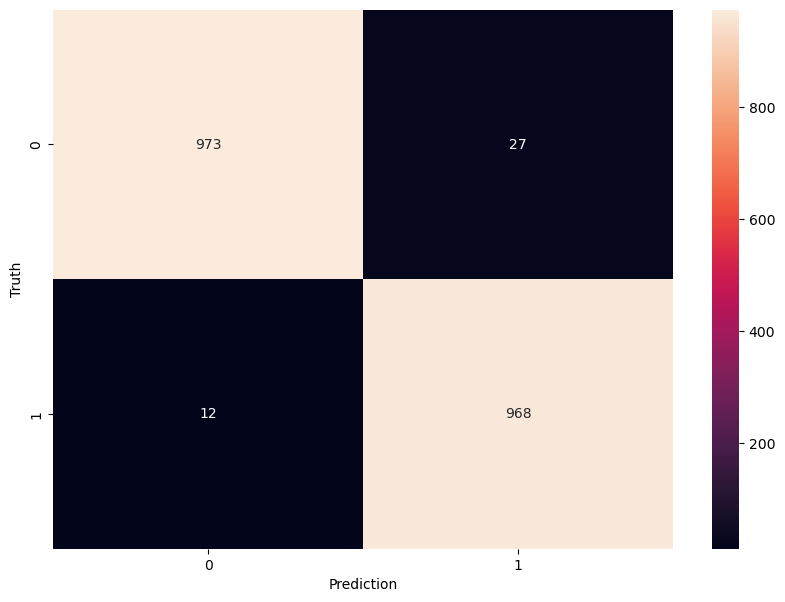

In [155]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')